<a href="https://colab.research.google.com/github/omwtbarca/Chem1.0/blob/main/CHEM1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# rdkit!

## *rdkit*
> 和许多软件一样，输入源自Wikipedia的smiles码
* 生成分子结构式，
* 可以输出分子质量
* 可以检索分子中元素或者基团（本质就是ASCII码中的元素）


In [ ]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.7 MB 120.5 MB/s 


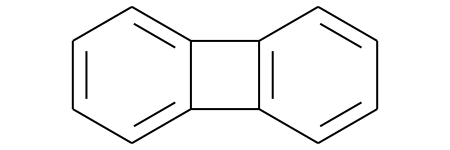

In [ ]:

m = Chem.MolFromSmiles('C1=CC2=C(C=C1)C1=CC=CC=C21')
m

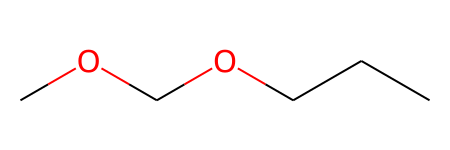

In [ ]:
mol= Chem.MolFromSmiles('COCOCCC')
mol


In [ ]:
smiles=Chem.MolToSmiles(mol)
smiles

'CCCOCOC'

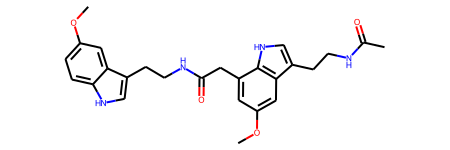

In [ ]:
mol= Chem.MolFromSmiles('CC(=O)NCCC1=CNc2c1cc(OC)cc2CC(=O)NCCc1c[nH]c2ccc(OC)cc12')
mol

In [ ]:
mt1 = Descriptors.MolWt(mol)
mt1

462.55000000000024

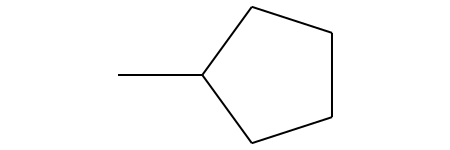

In [ ]:
mol= Chem.MolFromSmiles('C1CCCC1C')
mol

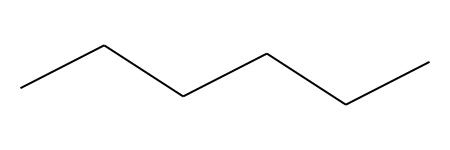

In [ ]:
mol= Chem.MolFromSmiles('CCCCCC')
mol

In [ ]:
mt1 = Descriptors.MolWt(mol)
mt1

86.178

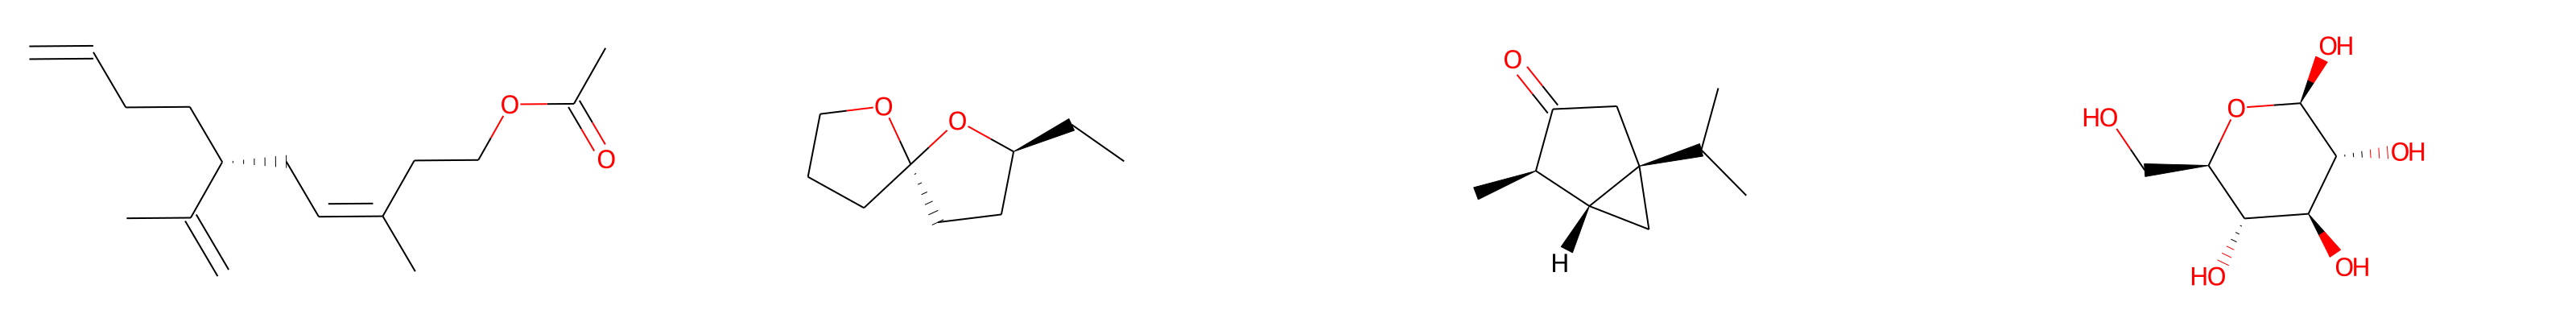

In [ ]:
smiles_list=['CC(=O)OCCC(/C)=C\C[C@H](C(C)=C)CCC=C',
      'CC[C@H](O1)CC[C@@]12CCCO2',  #信心素……
      'CC(C)[C@@]12C[C@@H]1[C@@H](C)C(=O)C2',
      'OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@H](O)1'] #吡南葡萄糖
mol_list=[]
for smiles in smiles_list:
  mol=Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
img=Draw.MolsToGridImage(mol_list,molsPerRow=4, subImgSize=(800, 400))
img

* 组成搜索

In [ ]:
pattern= Chem.MolFromSmiles('O')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

True
True
True
True


In [ ]:
pattern= Chem.MolFromSmiles('C(=O)O')   # A哪些有酯基
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

True
False
False
False


In [ ]:
pattern= Chem.MolFromSmiles('C(=O)')   #哪些有羰基
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

True
False
True
False


## fp and Tanimoto Simiilarity
eg:{α-Thujone}



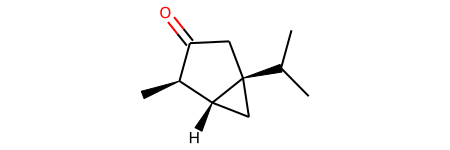

In [ ]:
α_Thujone=mol_list[2]
α_Thujone

In [ ]:
mw=Descriptors.MolWt(α_Thujone)
mw

152.23699999999997

In [ ]:
bi={}
fp=AllChem.GetMorganFingerprintAsBitVect(α_Thujone,2,nBits=1024,bitInfo=bi)
fp_arr=np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
fp_arr

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
np.nonzero(fp_arr)

(array([   1,   33,   36,  150,  153,  181,  204,  283,  285,  292,  314,
         356,  370,  438,  450,  519,  650,  660,  679,  900,  926,  928,
         940, 1019]),)

In [ ]:
list(fp.GetOnBits())

[1,
 33,
 36,
 150,
 153,
 181,
 204,
 283,
 285,
 292,
 314,
 356,
 370,
 438,
 450,
 519,
 650,
 660,
 679,
 900,
 926,
 928,
 940,
 1019]

In [ ]:
prints=[(α_Thujone,x,bi) for x in fp.GetOnBits()]
prints

[(<rdkit.Chem.rdchem.Mol at 0x7fc3279bd440>,
  1,
  {1: ((1, 0),),
   33: ((0, 0), (2, 0), (7, 0)),
   36: ((3, 0),),
   150: ((1, 1),),
   153: ((5, 2),),
   181: ((1, 2),),
   204: ((3, 1),),
   283: ((0, 1), (2, 1)),
   285: ((7, 1),),
   292: ((6, 2),),
   314: ((9, 1),),
   356: ((8, 0),),
   370: ((8, 1),),
   438: ((6, 1),),
   450: ((3, 2),),
   519: ((5, 1),),
   650: ((9, 0),),
   660: ((4, 2),),
   679: ((4, 1),),
   900: ((8, 2),),
   926: ((4, 0), (10, 0)),
   928: ((10, 2),),
   940: ((10, 1),),
   1019: ((5, 0), (6, 0))}),
 (<rdkit.Chem.rdchem.Mol at 0x7fc3279bd440>,
  33,
  {1: ((1, 0),),
   33: ((0, 0), (2, 0), (7, 0)),
   36: ((3, 0),),
   150: ((1, 1),),
   153: ((5, 2),),
   181: ((1, 2),),
   204: ((3, 1),),
   283: ((0, 1), (2, 1)),
   285: ((7, 1),),
   292: ((6, 2),),
   314: ((9, 1),),
   356: ((8, 0),),
   370: ((8, 1),),
   438: ((6, 1),),
   450: ((3, 2),),
   519: ((5, 1),),
   650: ((9, 0),),
   660: ((4, 2),),
   679: ((4, 1),),
   900: ((8, 2),),
   926:

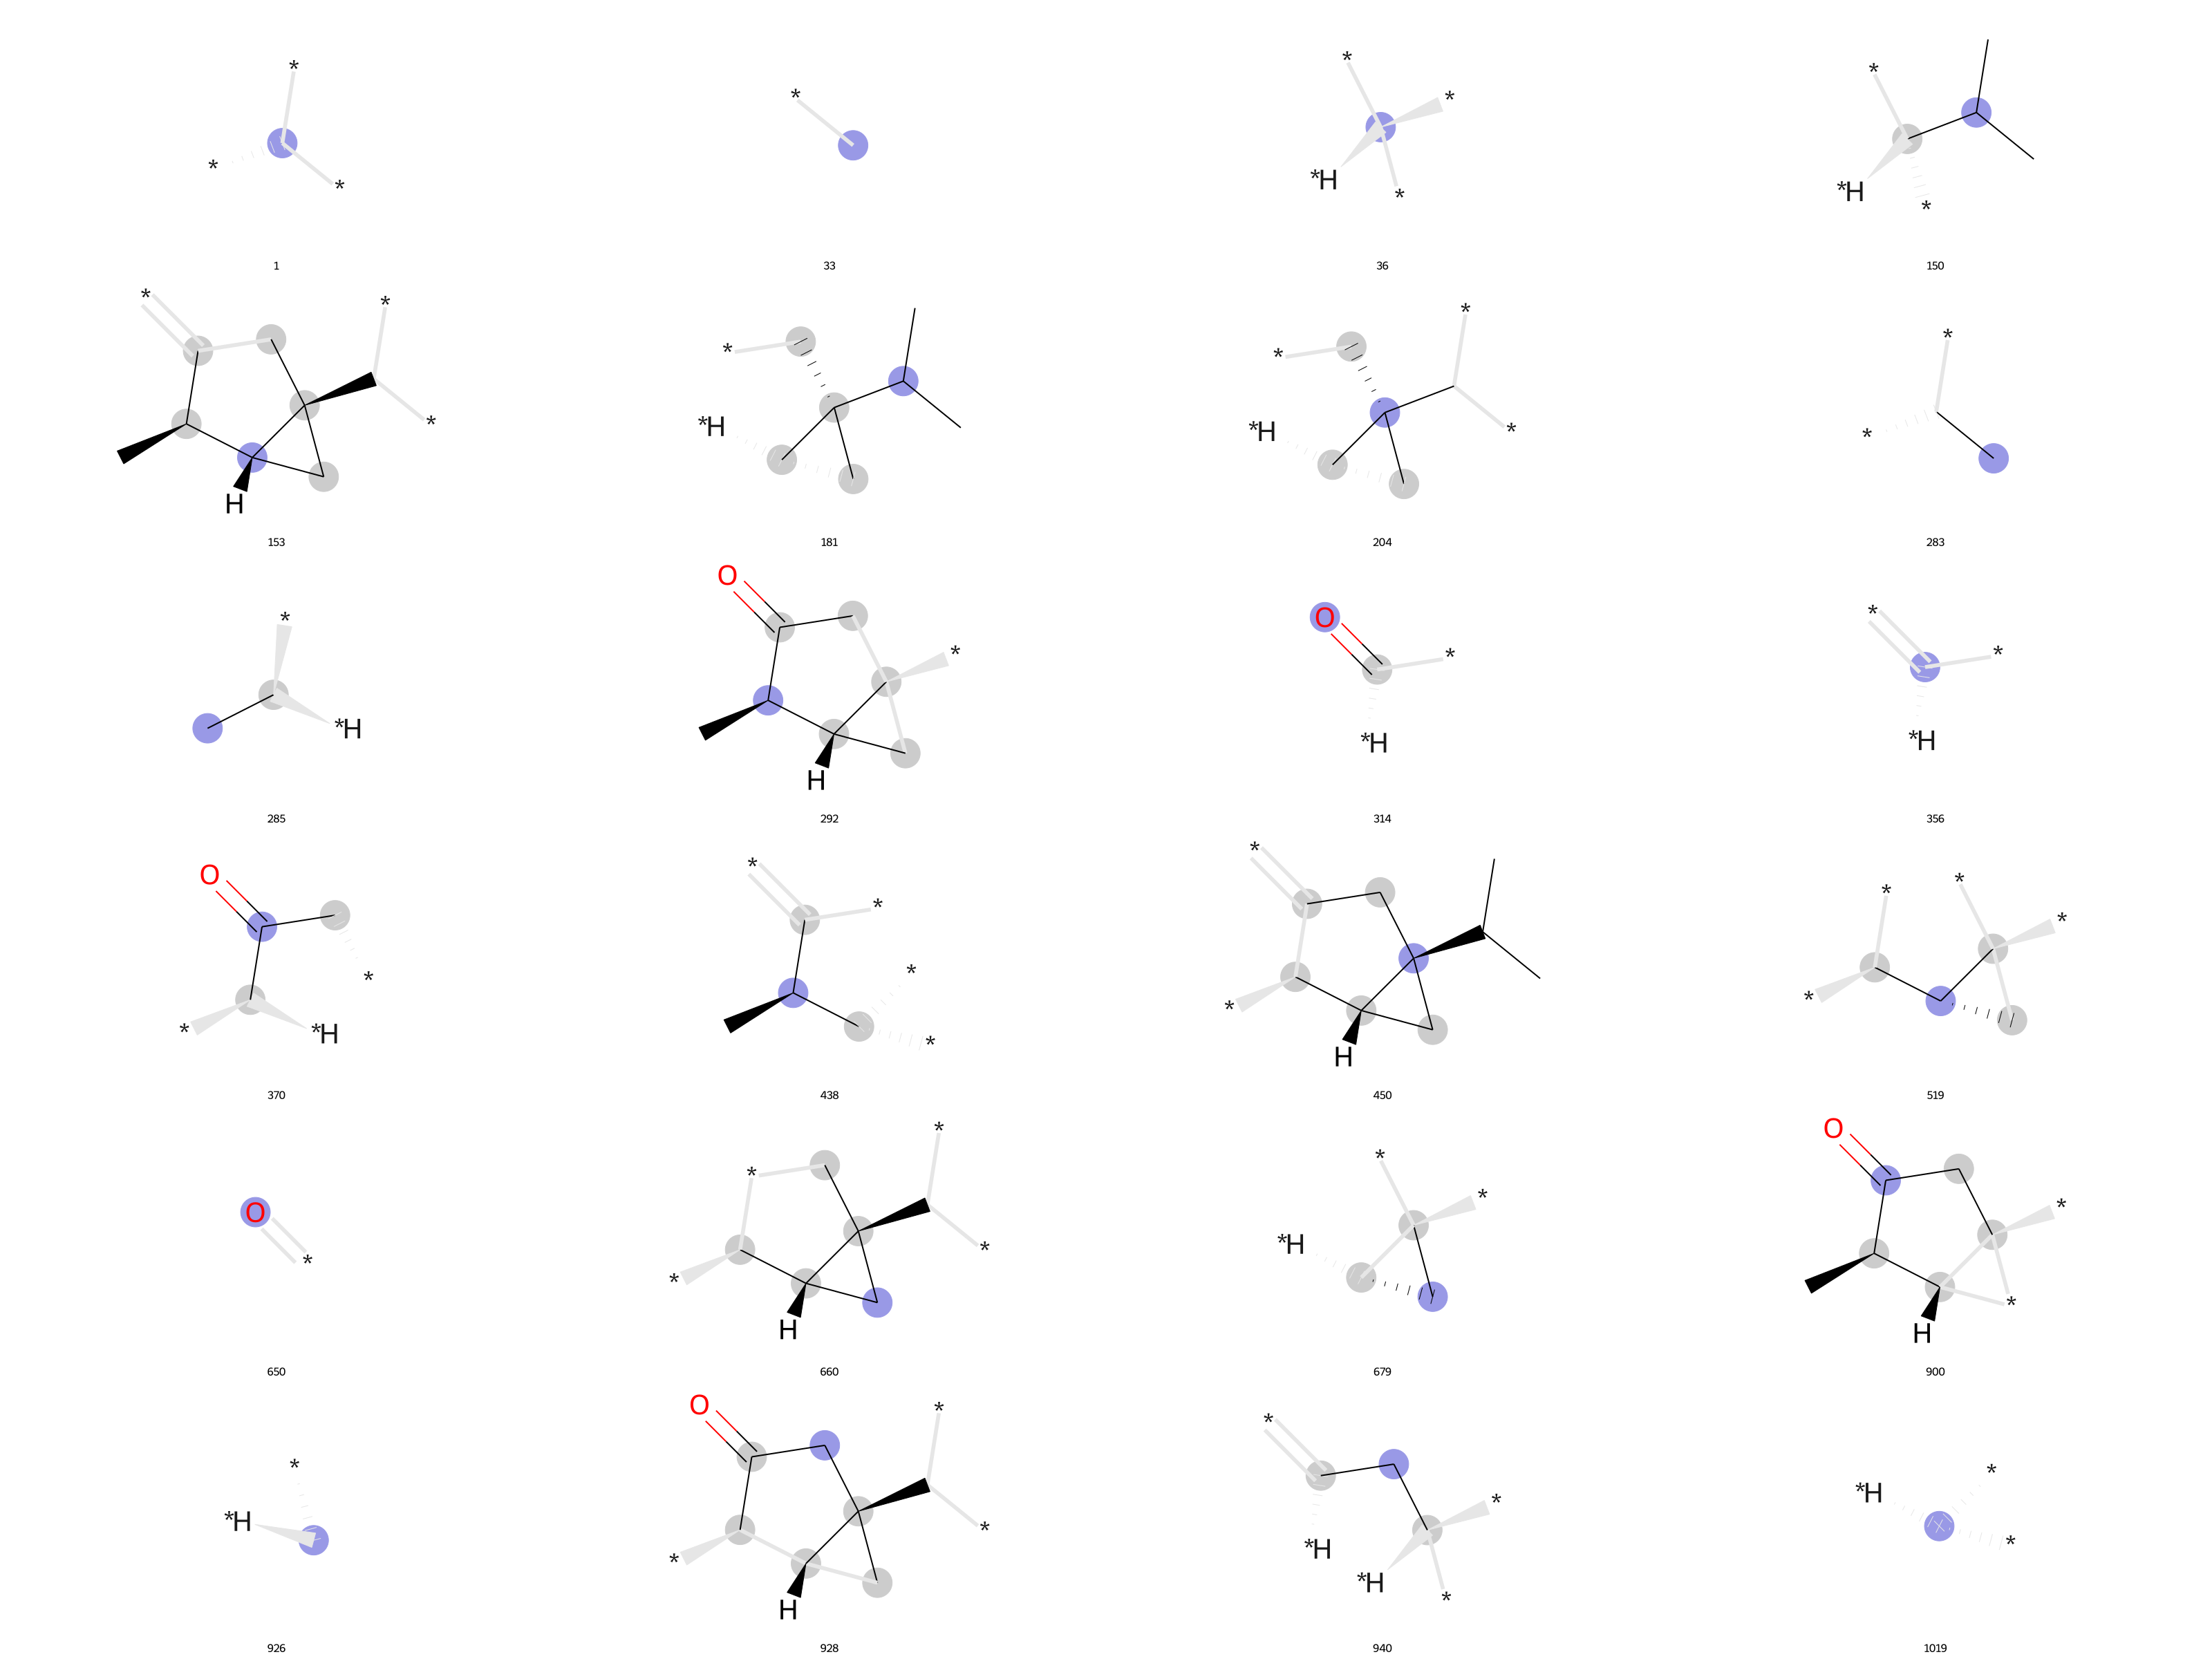

In [ ]:
Draw.DrawMorganBits(prints,molsPerRow=4,legends=[str(x) for x in fp.GetOnBits()], subImgSize=(800, 400))

### Do some comparisons  3rd VS 2nd

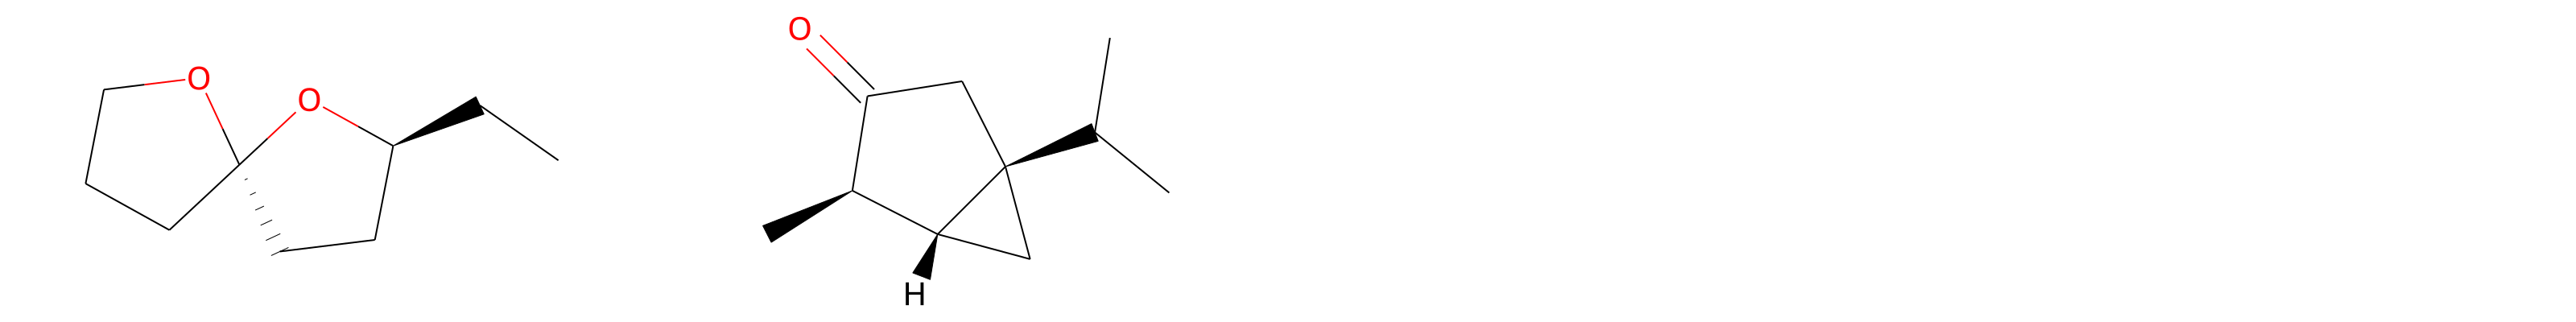

In [ ]:
Chalcogran=mol_list[1]
img=Draw.MolsToGridImage([Chalcogran,α_Thujone],molsPerRow=4, subImgSize=(800, 400))
img

In [ ]:

fp2=AllChem.GetMorganFingerprintAsBitVect(Chalcogran,2,nBits=1024,bitInfo=bi)
print('Chalcogran',list(fp2.GetOnBits()))
print('α_Thujone',list(fp.GetOnBits()))
common=set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined=set(fp.GetOnBits()) | set(fp2.GetOnBits())
print("common",common)  #交集与并集
print("combined",combined)
print((len(common)/len(combined))*100,'%')  #相似率
print(DataStructs.TanimotoSimilarity(fp,fp2))   #官方的相似率

Chalcogran [2, 4, 33, 36, 46, 80, 96, 104, 138, 280, 294, 301, 354, 367, 415, 430, 656, 662, 708, 840, 922, 926, 950, 959, 1017, 1019]
α_Thujone [1, 33, 36, 150, 153, 181, 204, 283, 285, 292, 314, 356, 370, 438, 450, 519, 650, 660, 679, 900, 926, 928, 940, 1019]
common {33, 1019, 36, 926}
combined {1, 2, 900, 4, 519, 650, 138, 656, 660, 150, 662, 280, 153, 922, 283, 285, 926, 415, 928, 33, 36, 292, 294, 679, 940, 301, 46, 430, 181, 438, 950, 314, 959, 450, 708, 840, 204, 80, 96, 354, 356, 104, 367, 370, 1017, 1019}
8.695652173913043 %
0.08695652173913043
